In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
cellphone_data = pd.read_csv('Cellphone.csv')
cellphone_data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
cellphone_data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


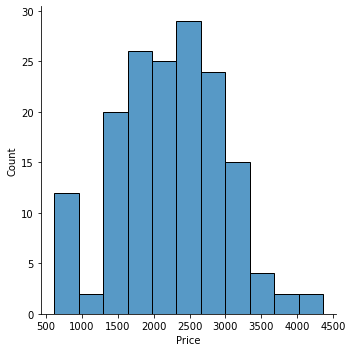

In [5]:
sns.displot(cellphone_data, x='Price')

## Is there a relationship between predictors and outcome?

### Estimating coefficients

In [6]:
Y = cellphone_data['Price']
X = cellphone_data.drop(columns=['Price','Product_id'])
X.head()

,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [7]:
X = sm.add_constant(X) #to add an intercept
X.head()

,const,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,1.0,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1.0,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1.0,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1.0,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1.0,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [8]:
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     256.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           1.74e-92
Time:                        12:55:21   Log-Likelihood:                -1049.6
No. Observations:                 161   AIC:                             2125.
Df Residuals:                     148   BIC:                             2165.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1749.5509    215.926      8.103      0.000    1322.855    2176.247
Sale            -0.0227      0.012     -1.959      0.052      -0.046       0.000
weight          -0.3796      0.694     -0.547      0.585      -1.751       0.992
resoloution    -77.5920     42.253     -1.836      0.068    -161.090       5.906
ppi              1.0057      0.217      4.633      0.000       0.577       1.435
cpu_core        53.9809      9.758      5.532      0.000      34.699      73.263
cpu_freq       131.8916     44.528      2.962      0.004      43.899     219.884
internal_mem     6.2499      1.225      5.100      0.000       3.828       8.672
ram             93.2032     25.619      3.638      0.000      42.577     143.829
RearCam          5.0453      4.332      1.165      0.246      -3.515      13.605
Front_Cam        8.9684      5.195      1.726      0.086      -1.297      19.234
battery          0.1259      0.030      4.140      0.000       0.066       0.186
thickness      -73.6888     12.475     -5.907      0.000     -98.342     -49.036
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                1.071
Skew:                           0.036   Prob(JB):                        0.585
Kurtosis:                       2.607   Cond. No.                     5.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**F-statistic value is greater than 1. Therefore we can reject the null hypothesis.**

## Can we model the relationship? 

### Accessing Model Accuracy 

An R2 value clode to 1 indicates that the model explains a large portion of the variance in the response variable.

In [9]:
#R2
result.rsquared, result.rsquared_adj

(0.9540797662196177, 0.9503565040212083)

## How are the predictors related to outcome?

### Accessing coefficients accuracy 

In [10]:
#standard error: a measure of average amount by which the estimated coefficients differ from the actual value 
result.bse

const           215.926030
Sale              0.011610
weight            0.694179
resoloution      42.253453
ppi               0.217058
cpu_core          9.757502
cpu_freq         44.527837
internal_mem      1.225476
ram              25.618878
RearCam           4.331663
Front_Cam         5.194611
battery           0.030408
thickness        12.475288
dtype: float64

In [11]:
#t-values: a measurement of the precision with which the coefficients were measured. 
#low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for the coefficient.
result.tvalues

const           8.102548
Sale           -1.959205
weight         -0.546882
resoloution    -1.836348
ppi             4.633413
cpu_core        5.532245
cpu_freq        2.962004
internal_mem    5.100000
ram             3.638067
RearCam         1.164746
Front_Cam       1.726481
battery         4.140021
thickness      -5.906783
dtype: float64

In [12]:
#p-values: a measurement of how likely the coefficients are measured through the model by chance
#a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance
result.pvalues

const           1.849975e-13
Sale            5.196796e-02
weight          5.852833e-01
resoloution     6.831271e-02
ppi             7.823703e-06
cpu_core        1.397003e-07
cpu_freq        3.561910e-03
internal_mem    1.024487e-06
ram             3.787262e-04
RearCam         2.459958e-01
Front_Cam       8.634756e-02
battery         5.809884e-05
thickness       2.299268e-08
dtype: float64

**Some of the coefficients have p-values greater than 0.05. This shows that the response is only associated with a subset of predictors.** 

### Variable Selection

In [13]:
cellphone_data.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu_core', 'cpu_freq', 'internal_mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [14]:
def train_model(data, response, predictors):
    Y = data[response]
    X = data[predictors]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    return result, model

In [15]:
def backward_selection(data, response, predictors, result):
    drop_columns = []
    while True:
        pvalues = result.pvalues
        max_value = 0
        max_key = -1
        for k in pvalues.keys():
            if pvalues[k] > max_value and pvalues[k] >= 0.05 and k != 'const':
                max_value = pvalues[k]
                max_key = k

        if max_key != -1:
            drop_columns.append(max_key)
            new_predictors = [x for x in predictors if x not in drop_columns]
            result,_ = train_model(cellphone_data, response, new_predictors)
        else:
            break
    
    return drop_columns

In [16]:
columns = ['Sale', 'weight', 'resoloution', 'ppi',
       'cpu_core', 'cpu_freq', 'internal_mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness']

final_predictors = []
drop_columns = []
for k in range(len(columns)):
    best_result = 0
    best_predictors = []
    
    for col in columns:
        new_predictors = final_predictors.copy()
        if col in new_predictors or col in drop_columns:
            continue
        
        new_predictors.append(col)
        result,_ = train_model(cellphone_data, 'Price', new_predictors)
    
        if len(best_predictors) == 0 or best_result.ssr > result.ssr:
            best_result = result
            best_predictors = new_predictors
    

    drop_columns.extend(backward_selection(cellphone_data, 'Price', best_predictors, best_result))
    
    final_predictors = [x for x in best_predictors if x not in drop_columns]
        
    

In [17]:
final_predictors

['ram', 'thickness', 'ppi', 'cpu_core', 'internal_mem', 'cpu_freq']

In [18]:

result,_ = train_model(cellphone_data, 'Price', final_predictors)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     437.9
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           4.65e-94
Time:                        12:55:21   Log-Likelihood:                -1064.7
No. Observations:                 161   AIC:                             2143.
Df Residuals:                     154   BIC:                             2165.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1427.6568    142.541     10.016      0.000    1146.070    1709.244
ram            136.6606     25.241      5.414      0.000      86.798     186.523
thickness      -61.4332     10.418     -5.897      0.000     -82.013     -40.853
ppi              1.1617      0.186      6.232      0.000       0.793       1.530
cpu_core        69.8081      8.947      7.803      0.000      52.134      87.482
internal_mem     6.3958      1.152      5.552      0.000       4.120       8.671
cpu_freq        99.6060     39.868      2.498      0.014      20.848     178.364
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.351
Skew:                           0.114   Prob(JB):                        0.839
Kurtosis:                       2.977   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**p-value for all the response variables is less than 0.05**

## Can we improve the model further? 

### Check for Linear Regression Assumptions

#### Non-Linearity

How to detect it:
1. By using a scatter plot to see the predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.
2. By plotting the residuals (y-y') versus the predicted values (y'). Ideally, the residual plot will show no discernible pattern.

In [19]:
def predict(model, data, response, predictors):
    Y = data[response]
    X = data[predictors]
    X = sm.add_constant(X)
    predicted_Y = model.predict(X) 
    return predicted_Y

In [21]:
result, model = train_model(cellphone_data, 'Price', final_predictors)
predicted_Y = predict(result, cellphone_data, 'Price', final_predictors)

In [22]:
Y = cellphone_data['Price']
residuals = Y - predicted_Y
df_results = pd.DataFrame({'Actual': Y, 'Predicted': predicted_Y, 'Residuals' : residuals})

<AxesSubplot:>

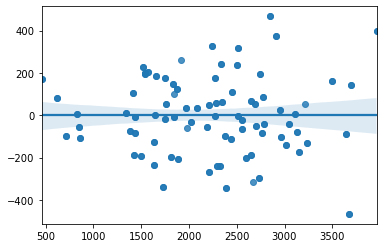

In [23]:
sns.regplot(x=predicted_Y, y=residuals)

**There is no discernible pattern in the residuals**

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


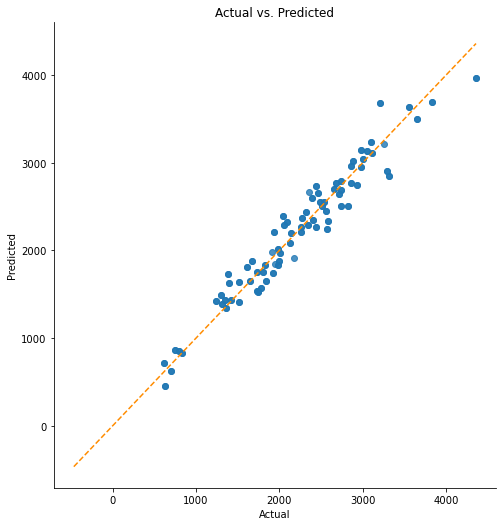

In [24]:
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)

# Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

**We can see a relatively even spread around the diagonal line.**

### Collinearity ###

In [26]:
data = cellphone_data[final_predictors]

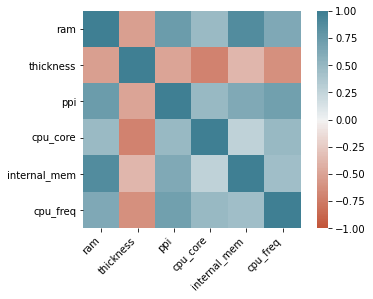

In [27]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [28]:
corr

,ram,thickness,ppi,cpu_core,internal_mem,cpu_freq
ram,1.000000,-0.521074,0.748724,0.483128,0.875354,0.633547
thickness,-0.521074,1.000000,-0.496791,-0.697935,-0.367412,-0.614458
ppi,0.748724,-0.496791,1.000000,0.487990,0.618560,0.713168
cpu_core,0.483128,-0.697935,0.487990,1.000000,0.276251,0.491519
internal_mem,0.875354,-0.367412,0.618560,0.276251,1.000000,0.441400
cpu_freq,0.633547,-0.614458,0.713168,0.491519,0.441400,1.000000


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def vif(data):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                              for i in range(len(data.columns))]

    print(vif_data)


In [30]:
vif(data)

        feature        VIF
0           ram  22.354241
1     thickness   4.509992
2           ppi  21.443333
3      cpu_core   7.229512
4  internal_mem   8.895476
5      cpu_freq  15.943724


In [31]:
vif(data.drop(columns=['ram','ppi']))


        feature       VIF
0     thickness  3.682867
1      cpu_core  6.011354
2  internal_mem  2.175166
3      cpu_freq  9.348632


In [32]:
final_predictors = ['thickness', 'cpu_core', 'internal_mem', 'cpu_freq']
result,_ = train_model(cellphone_data, 'Price', final_predictors)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     407.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           2.00e-81
Time:                        12:57:48   Log-Likelihood:                -1101.4
No. Observations:                 161   AIC:                             2213.
Df Residuals:                     156   BIC:                             2228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1396.7973    177.430      7.872      0.000    1046.323    1747.272
thickness      -53.6849     12.945     -4.147      0.000     -79.256     -28.114
cpu_core        98.4368     10.454      9.416      0.000      77.788     119.086
internal_mem    13.9895      0.710     19.700      0.000      12.587      15.392
cpu_freq       317.3165     40.435      7.847      0.000     237.445     397.188
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.833
Skew:                           0.176   Prob(JB):                        0.659
Kurtosis:                       2.979   Cond. No.                         379.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Outliers

How to detect: Plot the studentized residuals, computed by dividing each residual by its estimated standard error. Observations whose studentized residuals are greater than 3 in absolute value are possible outliers.

In [33]:
predictor_string = " + ".join(final_predictors)
formula = 'Price ~ ' + predictor_string
formula

'Price ~ thickness + cpu_core + internal_mem + cpu_freq'

In [34]:
from statsmodels.formula.api import ols
model = ols(formula, data=cellphone_data).fit()
#calculate studentized residuals
stud_res = model.outlier_test()

#display studentized residuals
print(stud_res)

     student_resid   unadj_p  bonf(p)
0        -0.360868  0.718689      1.0
1         0.957972  0.339568      1.0
2         0.178825  0.858309      1.0
3        -0.685732  0.493907      1.0
4         0.957972  0.339568      1.0
..             ...       ...      ...
156      -0.797871  0.426166      1.0
157      -2.676143  0.008248      1.0
158      -0.670760  0.503372      1.0
159      -2.676143  0.008248      1.0
160       0.451367  0.652356      1.0

[161 rows x 3 columns]


Text(0, 0.5, 'Studentized Residuals')

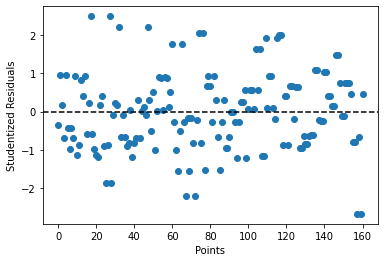

In [35]:
plt.scatter(x = cellphone_data.index, y=stud_res['student_resid'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals') 


#### High Leverage Points

In [36]:
influence = result.get_influence()
inf_sum = influence.summary_frame()

In [37]:
#Number of observations
n = cellphone_data.shape[0]

#Predictors
k = len(final_predictors)

#Leverage
cutoff_leverage = ((2*k)+2)/n
leverage = inf_sum.hat_diag
leverage_sort = inf_sum.sort_values(by = 'hat_diag', ascending = False)
print ('*'*20 + ' Highest Leverage Data Points ' + '*'*20)
print (leverage_sort.head())

******************** Highest Leverage Data Points ********************
     dfb_const  dfb_thickness  dfb_cpu_core  dfb_internal_mem  dfb_cpu_freq  \
140  -0.251364       0.340268      0.130105          0.070287     -0.015273   
141  -0.251364       0.340268      0.130105          0.070287     -0.015273   
83    0.015155      -0.011860     -0.029118          0.097001     -0.017340   
87    0.015155      -0.011860     -0.029118          0.097001     -0.017340   
156  -0.002143      -0.007858      0.052019         -0.249880      0.029490   

      cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
140  0.035941        1.037016  0.143178         0.423914       1.037268   
141  0.035941        1.037016  0.143178         0.423914       1.037268   
83   0.002269        0.315832  0.102126         0.106516       0.314919   
87   0.002269        0.315832  0.102126         0.106516       0.314919   
156  0.014328       -0.798802  0.100940        -0.267655      -0.797871   

   

In [38]:
high_leverage = pd.DataFrame((inf_sum.hat_diag[abs(leverage) > cutoff_leverage]))
high_leverage.shape

(14, 1)

In [39]:
indices = high_leverage.index.to_list()
cellphone_data = cellphone_data.drop(indices)
result, _ = train_model(cellphone_data, 'Price', final_predictors)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     317.1
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           1.06e-69
Time:                        12:58:07   Log-Likelihood:                -994.45
No. Observations:                 147   AIC:                             1999.
Df Residuals:                     142   BIC:                             2014.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1335.3511    198.829      6.716      0.000     942.305    1728.398
thickness      -50.9672     15.604     -3.266      0.001     -81.814     -20.121
cpu_core        90.8726     10.696      8.496      0.000      69.728     112.017
internal_mem    17.7859      1.315     13.527      0.000      15.187      20.385
cpu_freq       315.0804     39.720      7.933      0.000     236.561     393.599
==============================================================================
Omnibus:                        4.771   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.655
Skew:                           0.389   Prob(JB):                       0.0975
Kurtosis:                       2.606   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Non-constant Variance of Error Terms 

How to detect: From the presence of a funnel shape in the residual plot

<AxesSubplot:>

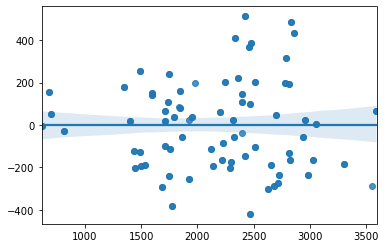

In [40]:
result,_ = train_model(cellphone_data, 'Price', final_predictors)
predicted_Y = predict(result, cellphone_data, 'Price', final_predictors)
Y = cellphone_data['Price']
residuals = Y - predicted_Y
df_results = pd.DataFrame({'Actual': Y, 'Predicted': predicted_Y, 'Residuals' : residuals})
sns.regplot(x=predicted_Y, y=residuals)

Points are not randomly scattered and it seems as the variance (i.e. spread) of the residuals increases as the predicted values increase.

In [41]:
import statsmodels.formula.api as smf

def train_WLS(data, response, predictors, wt):
    Y = data[response]
    X = data[predictors]
    X = sm.add_constant(X)
    model = sm.WLS(Y, X, weights=wt)
    result = model.fit()
    return result, model

result, _ = train_model(cellphone_data, 'Price', final_predictors)

#define weights to use
wt = 1 / smf.ols('result.resid.abs() ~ result.fittedvalues', data=cellphone_data).fit().fittedvalues**2

result_wls, _ = train_WLS(cellphone_data, 'Price', final_predictors, wt)
result_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.925
Model:                            WLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     436.9
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           1.04e-78
Time:                        12:58:10   Log-Likelihood:                -988.42
No. Observations:                 147   AIC:                             1987.
Df Residuals:                     142   BIC:                             2002.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1379.6084    186.008      7.417      0.000    1011.905    1747.312
thickness      -52.4568     14.249     -3.682      0.000     -80.623     -24.290
cpu_core        88.0145     10.618      8.289      0.000      67.025     109.004
internal_mem    18.7035      1.444     12.956      0.000      15.850      21.557
cpu_freq       292.0846     37.277      7.836      0.000     218.395     365.774
==============================================================================
Omnibus:                        7.464   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                4.422
Skew:                           0.241   Prob(JB):                        0.110
Kurtosis:                       2.301   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""